In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [54]:
from sklearn.datasets import load_iris

In [55]:
iris=load_iris()

In [56]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [57]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [58]:
## independent features
X=pd.DataFrame(iris['data'],columns=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm'])

In [59]:
## dependent features
y=iris['target']

In [60]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [61]:
## apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [62]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3181818181818182, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.22727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2727272727272727, 0.8571428571428572, 'True  '),
 Text(0.4090909090909091, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.36363636363636365, 0.8571428571428572, '  False'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.45454545454545453, 0.5, 'x[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[1] <= 2.9\ngini = 0.48\nsamples = 5\

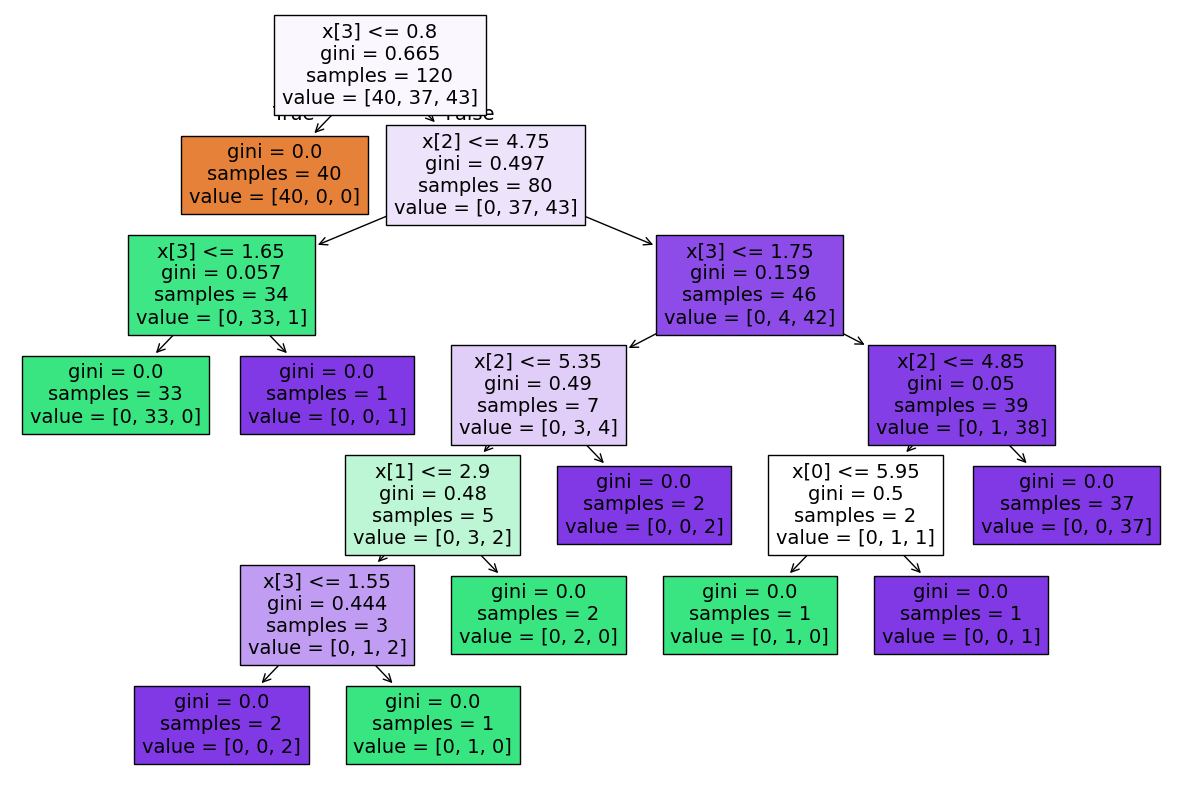

In [63]:
## visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [64]:
y_pred=treeclassifier.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



# Decision tree classifier prepruning and hyperparameter tuning

In [67]:
param={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [68]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
treemodel=DecisionTreeClassifier()

In [71]:
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy')

In [72]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [73]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [74]:
grid.best_score_

0.9583333333333334

In [75]:
y_pred=grid.predict(X_test)

In [76]:
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 2, 2])

In [77]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



In [78]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [79]:
score

0.9333333333333333